# Prediction and Exploratory Analysis on Medical Appointments No-Show/Show

In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from sklearn import model_selection, cross_validation, ensemble, preprocessing, svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import learning_curve, ShuffleSplit, validation_curve
from sklearn.model_selection import GridSearchCV

C:\Users\Bhagyashree\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
app_data = pd.read_csv('./MedicalAppointment.csv')

In [3]:
app_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
app_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


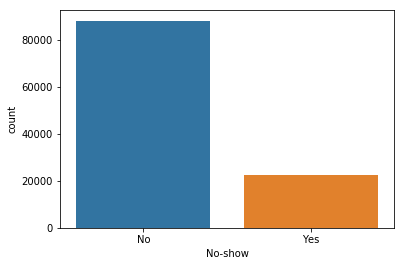

In [6]:
target=sns.countplot(x="No-show",data=app_data)

In [7]:
# Our target variable is unbalanced.Need to account for imbalance in the training model.

In [8]:
#Encoding the No-show Variable.
app_data['noshow']= [0 if i=='No' else 1 for i in app_data['No-show']]


In [9]:
#Delting rows with age<0
app_data=app_data[app_data.Age>0]

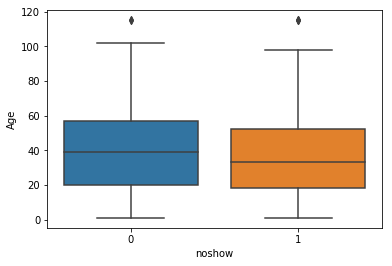

In [10]:
app_hist=sns.boxplot(x='noshow',y="Age",data=app_data)

In [11]:
#There are couple of outliers but those do not seem totally unrealistic to me. 
#Interestingly, mean age of people missed appointment is lower than other group.


noshow
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

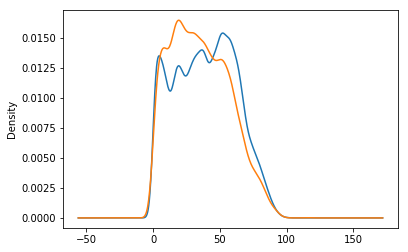

In [12]:
app_data.groupby('noshow').Age.plot(kind='kde')

#Younger people (age < 48 years) are better at showing up on scheduled days but trend reverses after age of 48 years.
#One of the reasons to categorize this variable.

In [13]:
app_data['age_cat']=pd.qcut(app_data['Age'], 5, labels=False)


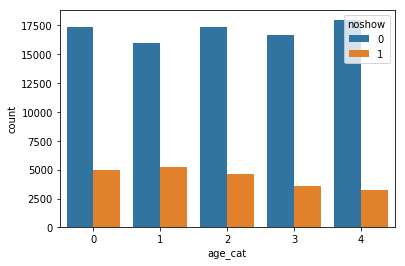

In [14]:
sns.countplot(x="age_cat", hue = "noshow", data=app_data)

In [15]:
Getting DATES from schedule and appointmentdate

SyntaxError: invalid syntax (<ipython-input-15-0d3d674ffd3f>, line 1)

In [ ]:
app_data['scheduled'] = app_data['ScheduledDay'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
app_data['appointment']=app_data['AppointmentDay'].apply(lambda x:datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ'))

In [ ]:
app_data['diff_time'] =  (app_data['appointment'] - app_data['scheduled']).dt.days
app_data['hour'] = app_data['scheduled'].dt.hour
app_data['weekday'] = app_data['scheduled'].dt.weekday
app_data['diff_time'] = [0 if i < 0 else i for i in app_data['diff_time']]

In [ ]:
sns.boxplot(x='noshow',y='diff_time',data=app_data)

Clearly, people who are missing appoints have larger gap between the scheduled day and appointment day.

In [ ]:
app_data['diff_time_cat']=[1 if i<1 else i for i in app_data['diff_time']]
app_data['diff_time_cat'] = [2 if i > 1 and i <= 7 else i for i in app_data['diff_time_cat']]
app_data['diff_time_cat'] = [3 if i > 7 and i <= 30 else i for i in app_data['diff_time_cat']]
app_data['diff_time_cat'] = [4 if i > 30 else i for i in app_data['diff_time_cat']]

In [ ]:
sns.countplot(x="diff_time_cat", hue = "noshow", data=app_data)

In [ ]:
sns.countplot(x="weekday", hue = "noshow", data=app_data)

In [ ]:
sns.countplot(x="hour", hue = "noshow", data=app_data)

In [ ]:
sns.distplot(app_data.diff_time);

In [ ]:
sns.countplot(x="Gender", data=app_data)

In [ ]:
app_data.groupby(['noshow'])['diff_time'].mean()

In [ ]:
app_data['sex'] = [1 if i == 'M' else 0 for i in app_data['Gender']]

In [ ]:
app_data['area'] = pd.factorize(app_data['Neighbourhood'])[0]

In [ ]:
sns.countplot(x="area", data=app_data)

Lets train the model.

In [ ]:
X = app_data[['age_cat','Hipertension', 'Alcoholism', 'Diabetes', 
                         'area', 'Scholarship', 'sex', 'SMS_received', 'hour', 'weekday', 'diff_time_cat']]

In [ ]:
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Here are some correlations,Diabetes and hypertension are correlated. Another with sms recieved and time 
differnece between appointment day and scheduled day.

In [ ]:
y=app_data['noshow']

In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.20,random_state=1)

In [ ]:
x_train.head()

In [ ]:
clf = ensemble.RandomForestClassifier(max_depth = 12, n_estimators= 10, verbose=0, class_weight= {0:1, 1:3})
clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
clf.score(x_test, y_test)

In [ ]:
clf.score(x_train, y_train)

In [ ]:
roc_auc_score(y_test, y_pred)


In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
importances = clf.feature_importances_
estimators=clf.estimators_
print(importances)


In [ ]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


We got very good accuracy to start with.
We can improve this model by using learning curves and cross validation.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
class_names = ['0', '1']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()